<a href="https://colab.research.google.com/github/Bhojraj-Jadhav/Bike-shairing-demand-prediction/blob/main/Bike_Sharing_Demand_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project name:-** Bike Sharing Demand Prediction

###**Type :-** Supervised Machine Learning 

##### **Team Member 1 :-**Shubham chougule
##### **Team Member 2 :-**Akshada Phunde
##### **Team Member 3 :-**Bhojraj Jadhav
##### **Team Member 4 :-**Suraj Pardeshi
##### **Team Member 5 :-**Shruti Jain


# **Project Summary :-** 
The contents of the data came from a city called Seoul. It is the capital city of South Korea and has a population of around 9.7 million people. It was the 4th largest metropolitan economy in 2014. It has humid continental climate influenced by monsoons. The data had variables such as date, hour, temperature, humidity, wind-speed, visibility, dew point temperature, solar radiation, rainfall, snowfall, seasons, holiday, functioning day and rented bike count.
The problem statement was to build a machine learning model that could predict the rented bike count required for an hour, given other variables. The first step in the exercise involved exploratory data analysis where we tried to dig insights from the data in hand. It included univariate and multivariate analysis in which we identified certain trends, relationships, correlation and found out the features that had some impact on our dependent variable. The second step was to clean the data and perform modifications. We checked for missing values and outliers and removed irrelevant features. We also encoded the categorical variables. The third step was to try various machine learning algorithms on our split and standardized data. We tried different algorithms namely Linear regression, Random forest and Decision Tree .  The best performance was given by the Gradient boosting and Random forest model where the R2_score for training and test set was 0.83 and 0.81 respectively.
The most important features who had a major impact on the model predictions were; hour, temperature, wind-speed, solar-radiation, month and seasons. Demand for bikes got higher when the temperature and hour values were more. Demand was high for low values of wind-speed and solar radiation. Demand was high during springs and summer and very low during winters.
•	The model performed well in this case but as the data is time dependent, values of temperature, wind-speed, solar radiation etc. will not always be consistent. Therefore, there will be scenarios where the model might not perform well. As Machine learning is an exponentially evolving field, we will have to be prepared for all contingencies and also keep checking our model from time to time


**GitHub Link :-** https://github.com/Bhojraj-Jadhav

# **Problem Statement**

 To combine the historical bike usage patterns with the weather data in order to forecast bike rental demand.


  	


Target Column to be predicted: COUNT- for each hour to be stable supply of rental bikes.

Input Columns used as variables .[Date ,Rented bike count,Hour,Temperature,Humidity,Wind speed,Visibility,Dew point temperature,Solar radiation,Rainfall,Snowfall,Season,Holiday,Functioning day]



# **Business Objective :-**

The objective of the project is to perform exploratory data analysis, data
pre-processing, data cleaning & imputation, and in the end, apply different Data Visualization techniques to get meaningful insights and apply different models to predict from the given data. Currently Rental bikes are introduced in many urban cities for the enhancement of mobility comfort. It is important to make the rental bike available and accessible to the public at the right time as it lessens the waiting time. Eventually, providing the city with a stable supply of rental bikes becomes a major concern. The crucial part is the prediction of bike count required at each hour for the stable supply of rental bikes.

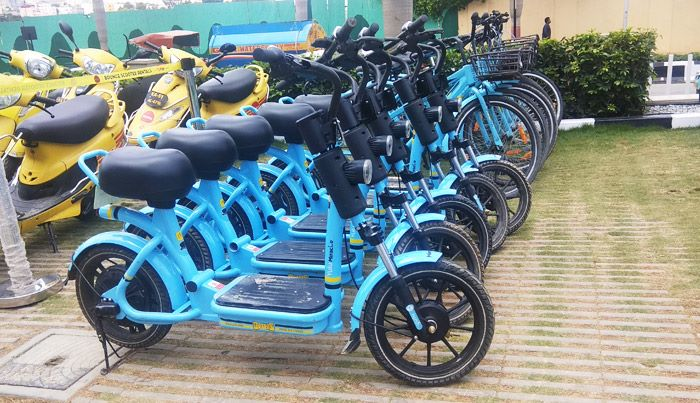

#**Introduction**

Bike sharing systems are a means of renting bicycles where the process of obtaining membership, rental, and bike return is automated with using network and locations throughout a city. Using these systems, people are able to take rent a  bike from a one location and return it to a different place on an as-needed basis. Currently, there are various bike-sharing programs around the world.

# Lets begin with importing the libraries and Loading the dataset 

In [119]:
# Firstly Importing the libraries which is required to perform coding operations.
# let's import the modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from datetime import datetime
import datetime as dt

from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.preprocessing import PolynomialFeatures

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.linear_model import ElasticNet
from sklearn.tree import DecisionTreeRegressor

from sklearn.model_selection import cross_validate
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV

from sklearn import metrics
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_absolute_error

from sklearn.pipeline import make_pipeline

from sklearn.ensemble import GradientBoostingRegressor

from xgboost import XGBRegressor


import warnings
warnings.filterwarnings('ignore')

In [120]:
# Mounting the Google Drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [121]:
# Reading the comma seperated value file by using pandas operation. 
df= pd.read_csv('/content/drive/MyDrive/Ml project1/SeoulBikeData.csv', encoding= 'unicode_escape')

In [122]:
# Let's take a first look at the Rented Bike demand 
# Firt 5 rows

df.head()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes


In [123]:
# Last 5 rows

df.tail()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
8755,30/11/2018,1003,19,4.2,34,2.6,1894,-10.3,0.0,0.0,0.0,Autumn,No Holiday,Yes
8756,30/11/2018,764,20,3.4,37,2.3,2000,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes
8757,30/11/2018,694,21,2.6,39,0.3,1968,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes
8758,30/11/2018,712,22,2.1,41,1.0,1859,-9.8,0.0,0.0,0.0,Autumn,No Holiday,Yes
8759,30/11/2018,584,23,1.9,43,1.3,1909,-9.3,0.0,0.0,0.0,Autumn,No Holiday,Yes


In [124]:
# Illustrate the Information of dataset.

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Date                       8760 non-null   object 
 1   Rented Bike Count          8760 non-null   int64  
 2   Hour                       8760 non-null   int64  
 3   Temperature(°C)            8760 non-null   float64
 4   Humidity(%)                8760 non-null   int64  
 5   Wind speed (m/s)           8760 non-null   float64
 6   Visibility (10m)           8760 non-null   int64  
 7   Dew point temperature(°C)  8760 non-null   float64
 8   Solar Radiation (MJ/m2)    8760 non-null   float64
 9   Rainfall(mm)               8760 non-null   float64
 10  Snowfall (cm)              8760 non-null   float64
 11  Seasons                    8760 non-null   object 
 12  Holiday                    8760 non-null   object 
 13  Functioning Day            8760 non-null   objec

In [125]:
# Here we describe the dataset which shows aggregated and percentagewise values.

df.describe().T

,count,mean,std,min,25%,50%,75%,max
Rented Bike Count,8760.0,704.602055,644.997468,0.0,191.00,504.50,1065.25,3556.00
Hour,8760.0,11.500000,6.922582,0.0,5.75,11.50,17.25,23.00
Temperature(°C),8760.0,12.882922,11.944825,-17.8,3.50,13.70,22.50,39.40
Humidity(%),8760.0,58.226256,20.362413,0.0,42.00,57.00,74.00,98.00
Wind speed (m/s),8760.0,1.724909,1.036300,0.0,0.90,1.50,2.30,7.40
Visibility (10m),8760.0,1436.825799,608.298712,27.0,940.00,1698.00,2000.00,2000.00
Dew point temperature(°C),8760.0,4.073813,13.060369,-30.6,-4.70,5.10,14.80,27.20
Solar Radiation (MJ/m2),8760.0,0.569111,0.868746,0.0,0.00,0.01,0.93,3.52
Rainfall(mm),8760.0,0.148687,1.128193,0.0,0.00,0.00,0.00,35.00
Snowfall (cm),8760.0,0.075068,0.436746,0.0,0.00,0.00,0.00,8.80


### *This Dataset contains 8760 rows and 14 columns.*
In a day we have 24 hours and we have 365 days a year so 365 multiplied by 24 = 8760, which represents the number of line in the dataset.

## Features description:-

Date : The date of the day, during 365 days from 01/12/2017 to 30/11/2018, formating in DD/MM/YYYY, type : str, we need to convert into datetime format.

Rented Bike Count : Number of rented bikes per hour which our dependent variable and we need to predict that, type : int

Hour: The hour of the day, starting from 0-23 it's in a digital time format, type : int, we need to convert it into category data type.

Temperature(°C): Temperature in Celsius, type : Float

Humidity(%): Humidity in the air in %, type : int

Wind speed (m/s) : Speed of the wind in m/s, type : Float

Visibility (10m): Visibility in m, type : int

Dew point temperature(°C): Temperature at the beggining of the day, type : Float

Solar Radiation (MJ/m2): Sun contribution, type : Float

Rainfall(mm): Amount of raining in mm, type : Float

Snowfall (cm): Amount of snowing in cm, type : Float

Seasons: Season of the year, type : str, there are only 4 season's in data .

Holiday: If the day is holiday period or not, type: str

Functioning Day: If the day is a Functioning Day or not, type : str

In [126]:
# Mentioned the shape of data.

print(f' We have total {df.shape[0]} rows and {df.shape[1]} columns.')

 We have total 8760 rows and 14 columns.


In [127]:
# Important columns names  which is included in dataset.

column=df.columns
column

Index(['Date', 'Rented Bike Count', 'Hour', 'Temperature(°C)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(°C)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)', 'Seasons',
       'Holiday', 'Functioning Day'],
      dtype='object')

In [128]:
# Checking the null values of data.

df.isnull().sum()

Date                         0
Rented Bike Count            0
Hour                         0
Temperature(°C)              0
Humidity(%)                  0
Wind speed (m/s)             0
Visibility (10m)             0
Dew point temperature(°C)    0
Solar Radiation (MJ/m2)      0
Rainfall(mm)                 0
Snowfall (cm)                0
Seasons                      0
Holiday                      0
Functioning Day              0
dtype: int64

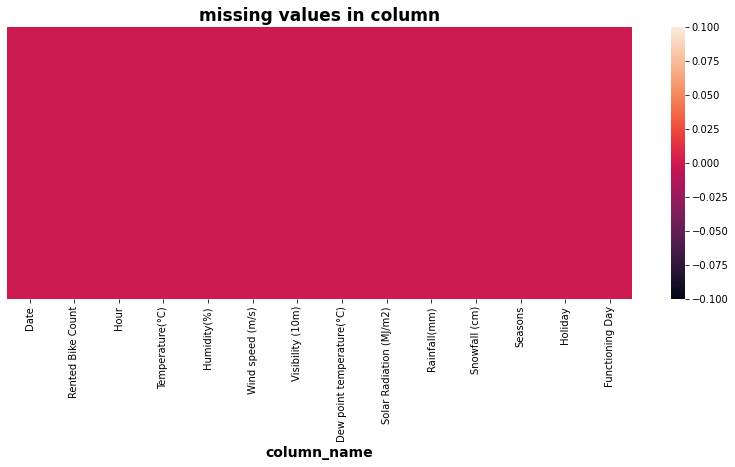

In [129]:
# Checking missing values using heatmap.

plt.figure(figsize=(14, 5))
sns.heatmap(df.isnull(), cbar=True, yticklabels=False)
plt.xlabel("column_name", size=14, weight="bold")
plt.title("missing values in column",fontweight="bold",size=17)
plt.show()

Here we don't have any missing values in our dataset.

In [130]:
# Checking Duplicate Values

value=len(df[df.duplicated()])
print("The number of duplicate values in the data set is = ",value)

The number of duplicate values in the data set is =  0


In [131]:
# Extracting categorical features from dataset.

categorical_features= df.select_dtypes(include='object')
categorical_features

,Date,Seasons,Holiday,Functioning Day
0,01/12/2017,Winter,No Holiday,Yes
1,01/12/2017,Winter,No Holiday,Yes
2,01/12/2017,Winter,No Holiday,Yes
3,01/12/2017,Winter,No Holiday,Yes
4,01/12/2017,Winter,No Holiday,Yes
...,...,...,...,...
8755,30/11/2018,Autumn,No Holiday,Yes
8756,30/11/2018,Autumn,No Holiday,Yes
8757,30/11/2018,Autumn,No Holiday,Yes
8758,30/11/2018,Autumn,No Holiday,Yes


Here we found 4 columns of categorical features

In [132]:
# Calculating value of counts of some features of dataset.

df['Functioning Day'].value_counts()

Yes    8465
No      295
Name: Functioning Day, dtype: int64

In [133]:
df['Holiday'].value_counts()

No Holiday    8328
Holiday        432
Name: Holiday, dtype: int64

In [134]:
df['Seasons'].value_counts()

Spring    2208
Summer    2208
Autumn    2184
Winter    2160
Name: Seasons, dtype: int64

In [135]:
# Converting string format of 'Date' column into date-time format.

df['Date'] = pd.to_datetime(df['Date'])

In [136]:
# Creating a column containing the year from a particular date.

year = []
for i in range(len(df['Date'])):
  year.append(df['Date'][i].year)
df['year'] = year


In [137]:
# Creating a column containing the month number from a particular date.

months = []
for i in range(len(df['Date'])):
  months.append(df['Date'][i].month)
df['month'] = months



In [138]:
# Group by the data on the basis of rented bike count.

df_Date = df.groupby('Date').sum()['Rented Bike Count']
df_Date

Date
2017-01-12     9539
2017-02-12     8523
2017-03-12     7222
2017-04-12     8729
2017-05-12     8307
              ...  
2018-12-07    29428
2018-12-08    17498
2018-12-09    31809
2018-12-10    26237
2018-12-11    21003
Name: Rented Bike Count, Length: 365, dtype: int64

In [139]:
# Creating a series which shows total number of bikes rented on the type of day

df_holiday = df.groupby('Holiday').sum()['Rented Bike Count']
df_holiday

Holiday
Holiday        215895
No Holiday    5956419
Name: Rented Bike Count, dtype: int64

In [140]:
# Group by the data on the basis of seasons. 

season_by= df.groupby('Seasons').sum()
season_by

,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),year,month
Seasons,,,,,,,,,,,,
Autumn,1790002,25116,30839.9,129355,3264.5,3408683,12009.2,1139.65,268.1,123.0,4407312,18816
Spring,1611909,25392,28807.1,129779,4139.1,2738725,9097.1,1520.84,403.8,0.0,4455744,10992
Summer,2283234,25392,58694.8,143479,3553.6,3315854,41400.3,1680.85,559.7,0.0,4455744,15048
Winter,487169,24840,-5487.4,107449,4153.0,3123332,-26820.0,644.07,70.9,534.6,4358136,12312


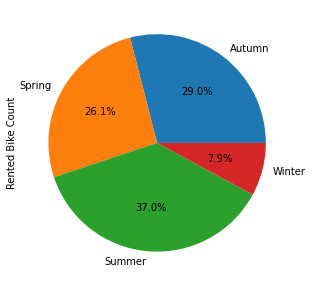

In [141]:
# Graphical representation of rented bike count along with seasons. 

season_by['Rented Bike Count'].plot(kind='pie', subplots=True, autopct='%1.1f%%', figsize=(5, 5));

Season wise percentage of the rented bike count. 

1. Autumn : 29%.
2. winter: 7.9%.
3. Summer: 37.0%.
4. Spring: 26.1%.


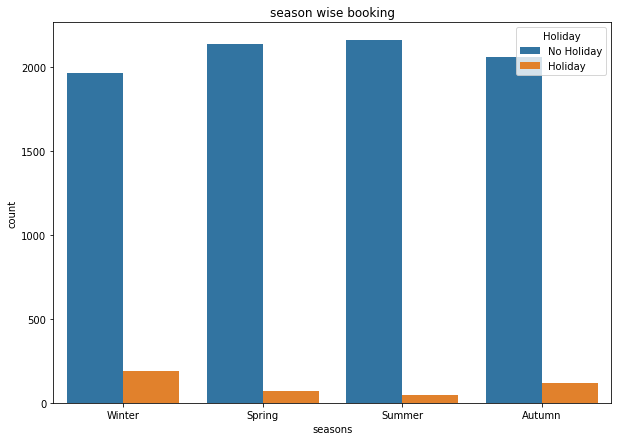

In [142]:
# Differentiation between holiday and working day on seasonal basis. 

plt.figure(figsize=(10,7))
sns.countplot(x=df['Seasons'],hue=df['Holiday'])
plt.title ("season wise booking")
plt.xlabel('seasons')
plt.ylabel('count');

Here we can clearly see that the number of booking the bike is more on working days than the holiday

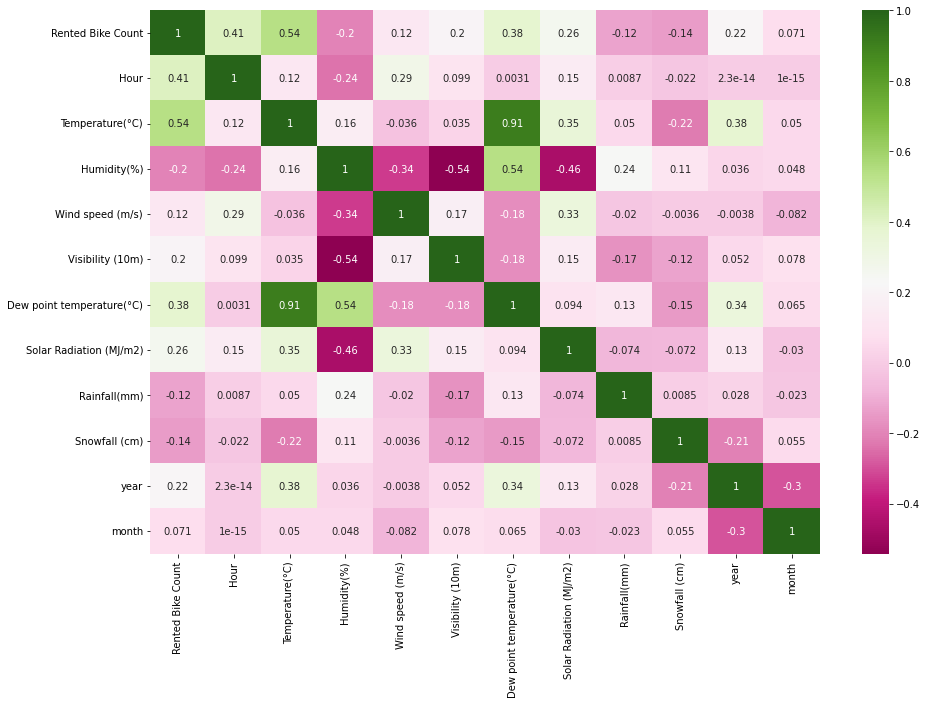

In [143]:
# Checking correlation using heatmap

plt.figure(figsize=(15,10))
sns.heatmap(df.corr(),cmap='PiYG',annot=True);

 Checking the correlation between the parameters (i.e beta)

 Darker the colour toward the green shows more the correlation between each other. 

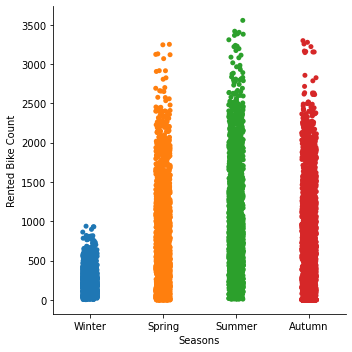

In [144]:
# Plotting cat plot for more info with season wise.
 
sns.catplot(x='Seasons',y='Rented Bike Count',data=df);

This plot shows the values of booking count per season.
 
 summer season has more booking counts 
 whereas the winter has opposite of it.

In [145]:
# On hourly basis rented bike count.

hour_wise = df.groupby('Hour').sum()['Rented Bike Count']
hour_wise

Hour
0     197633
1     155557
2     110095
3      74216
4      48396
5      50765
6     104961
7     221192
8     370731
9     235784
10    192655
11    219311
12    255296
13    267635
14    276971
15    302653
16    339677
17    415556
18    548568
19    436229
20    390172
21    376479
22    336821
23    244961
Name: Rented Bike Count, dtype: int64

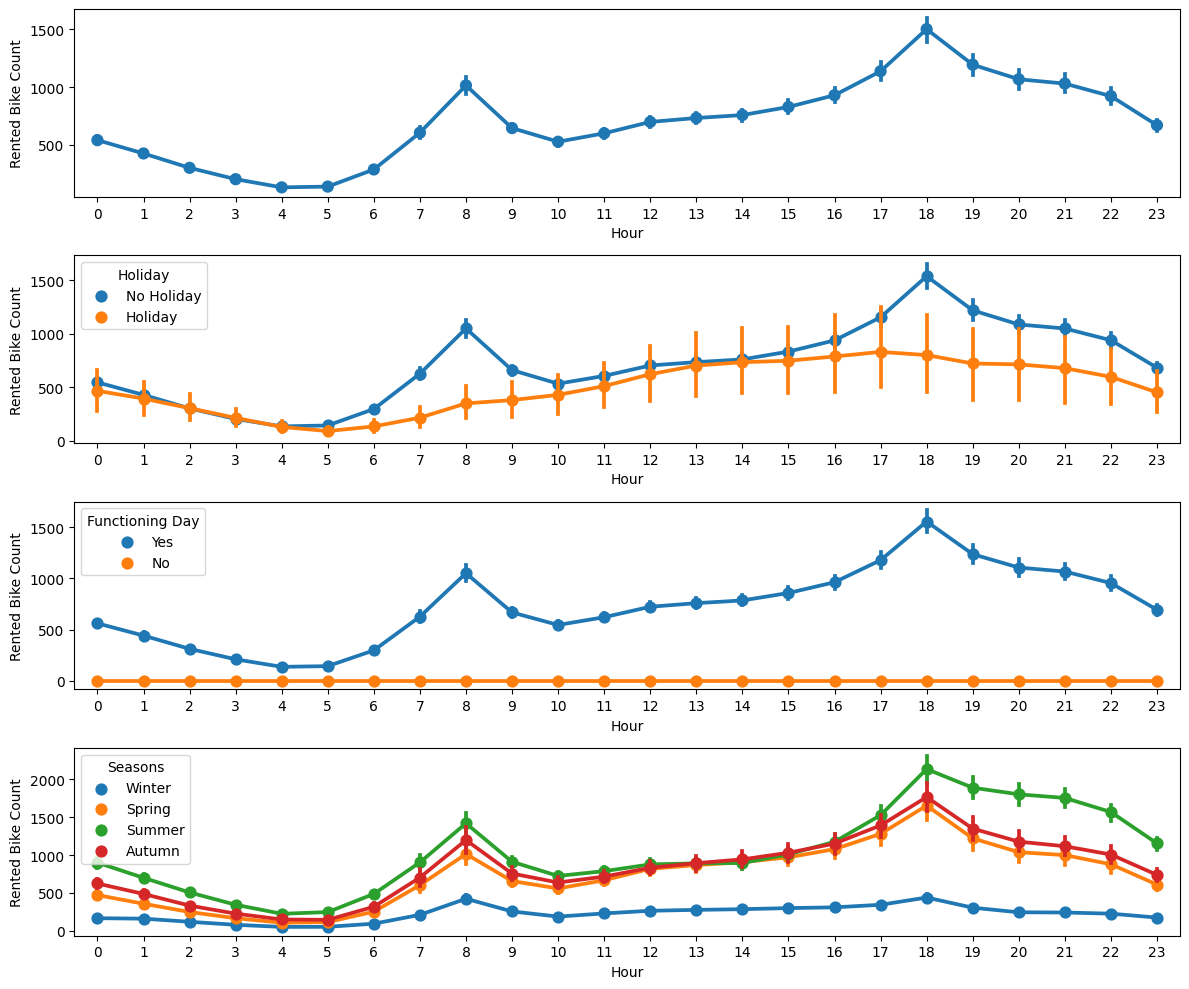

In [146]:
# Rented bike count as per hour,holidays,seasons,functional day.

fig, axs = plt.subplots(nrows=4,ncols=1,figsize=(12,10), dpi=100)
sns.pointplot(data=df, x="Hour", y="Rented Bike Count", ax=axs[0])
sns.pointplot(data=df, x="Hour", y="Rented Bike Count", ax=axs[1], 
              hue="Holiday")
sns.pointplot(data=df, x="Hour", y="Rented Bike Count", ax=axs[2], 
              hue="Functioning Day")
sns.pointplot(data=df, x="Hour", y="Rented Bike Count", ax=axs[3], 
              hue="Seasons")
plt.tight_layout()

1. On the basis of hour, the plot shows at 8th hour and 18th hour has maximum bookings.
2. 2nd plot shows the relation between the holiday and nonholiday on hourly basis.
3. 4th plot shows the data of retion between the hourly and seasonly basis.
  

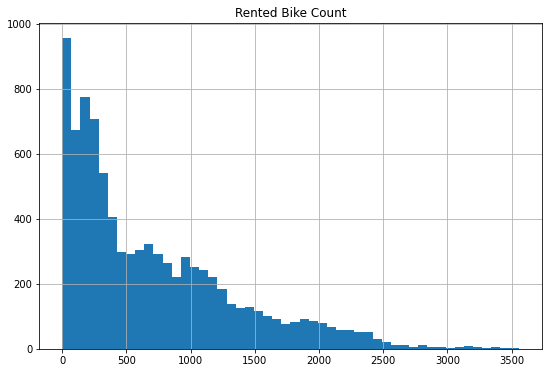

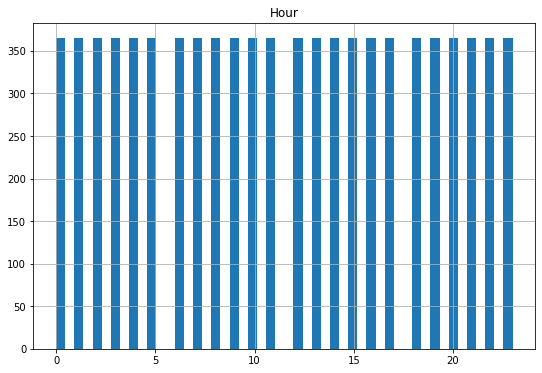

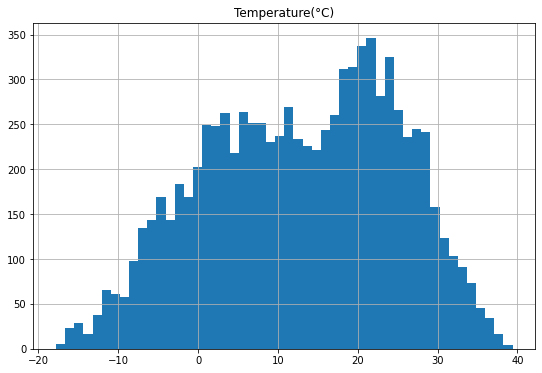

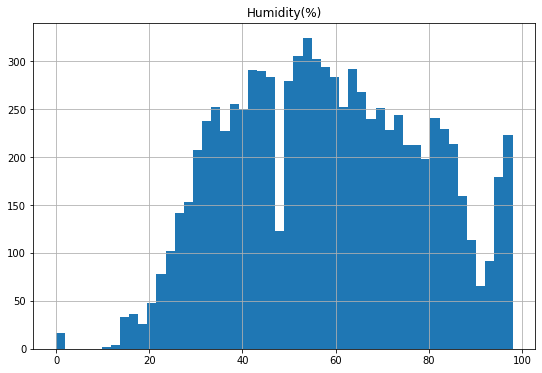

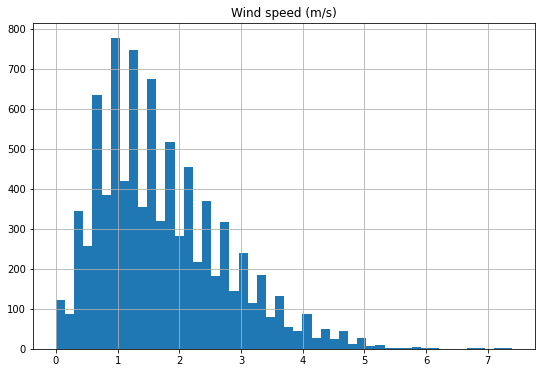

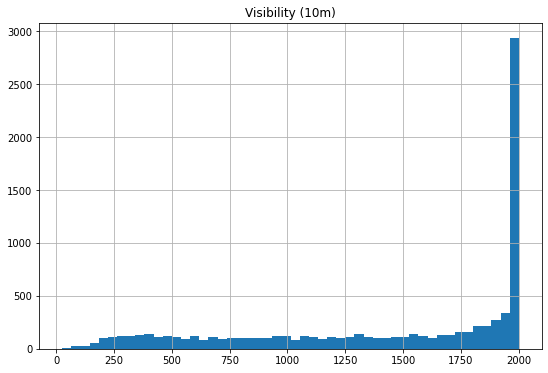

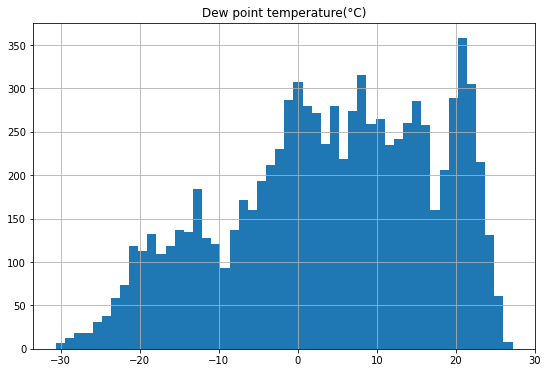

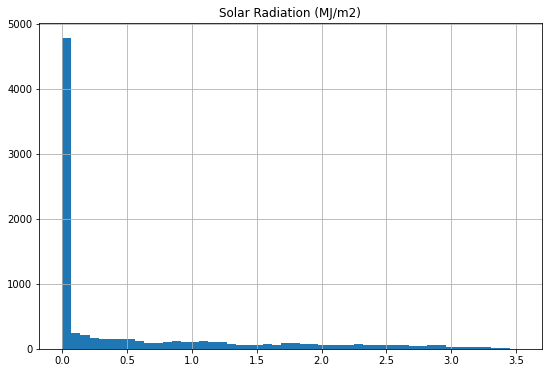

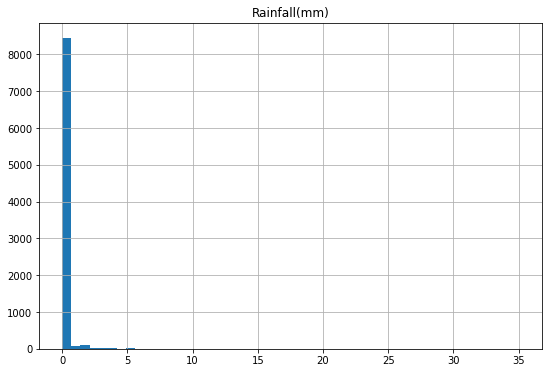

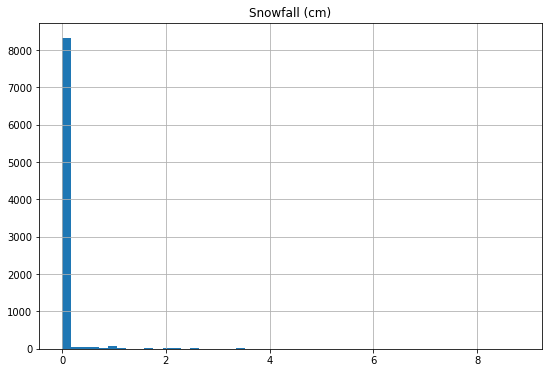

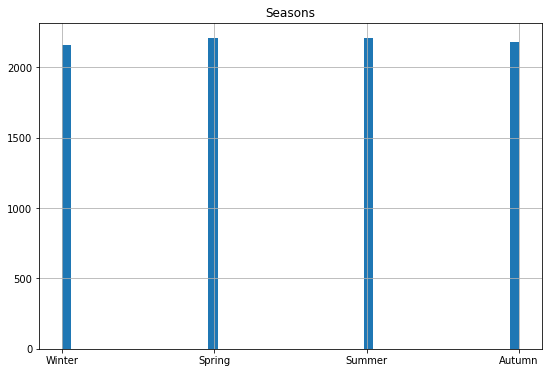

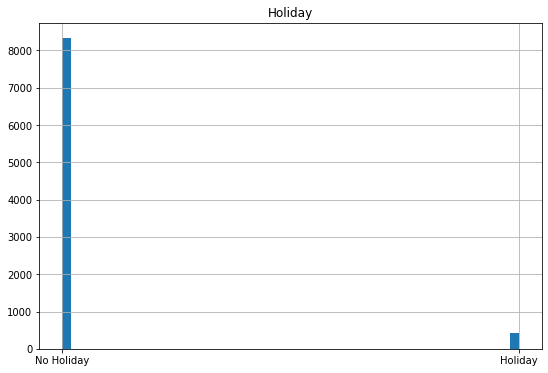

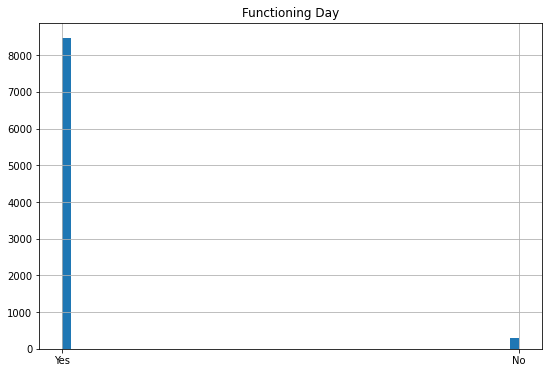

In [147]:
# Plotting the independent variables on the basis of dependent variables.
  
for col in column[1:]:
    fig = plt.figure(figsize=(9, 6))
    ax = fig.gca()
    feature = df[col]
    feature.hist(bins=50, ax = ax)   
    ax.set_title(col)
plt.show()


Here we are checking the linear correlation between all the independent features with dependant features.
1. Temperature data shows the symmetric distribution for the booking count, at specific range of temperature booking count goes higher.
2. In the Humidity plot there is mere collinear with the temperature column.
3. In the windspeed relation as the wind speed increases the booking count goes decreasing.
4. visibility counts increases beyond the 1750 units.
5. As the dewpoint temperature increase the counts or booking increases simultaneously.
6. Other column are either categorical or non correlated to the booking count.

In [148]:
# Creating a dataframe containing the count of bikes rented in different intensities of rainfall.

df_temp = pd.DataFrame(df.groupby('Temperature(°C)')['Rented Bike Count'].sum())
df_temp.reset_index(inplace=True)
df_temp.head()

,Temperature(°C),Rented Bike Count
0,-17.8,322
1,-17.5,291
2,-17.4,64
3,-16.9,36
4,-16.5,96


# Data preparation

In [149]:
# Creating a dummy variables for the season column.

df['Winter'] = np.where(df['Seasons']=='Winter', 1, 0)
df['Spring'] = np.where(df['Seasons']=='Spring', 1, 0)
df['Summer'] = np.where(df['Seasons']=='Summer', 1, 0)
df['Autumn'] = np.where(df['Seasons']=='Autumn', 1, 0)

df.drop(columns=['Seasons'],axis=1,inplace=True)

Linear algorithm only takes numeric data to compute the algorithm so here we are converted the object format of season column into binary format.
  

In [150]:
# encoding 'Holiday' column with 0 and 1.

for i in range(len(df['Holiday'])):
  if df['Holiday'][i] == 'No Holiday':
    df['Holiday'][i] = 0
  else:
    df['Holiday'][i] = 1  

Dealing with another object type column (i.e holiday non holiday into binary format)

In [151]:
# encoding 'Functioning Day' column with 0 and 1.

for i in range(len(df['Functioning Day'])):
  if df['Functioning Day'][i] == 'Yes':
    df['Functioning Day'][i] = 1
  else:
    df['Functioning Day'][i] = 0 

Again checking the data by taking a look at the first 5 columns

In [152]:
# Taking the look for the data whether the operation is placed or not.
 
df.head()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Holiday,Functioning Day,year,month,Winter,Spring,Summer,Autumn
0,2017-01-12,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,0,1,2017,1,1,0,0,0
1,2017-01-12,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,0,1,2017,1,1,0,0,0
2,2017-01-12,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,0,1,2017,1,1,0,0,0
3,2017-01-12,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,0,1,2017,1,1,0,0,0
4,2017-01-12,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,0,1,2017,1,1,0,0,0


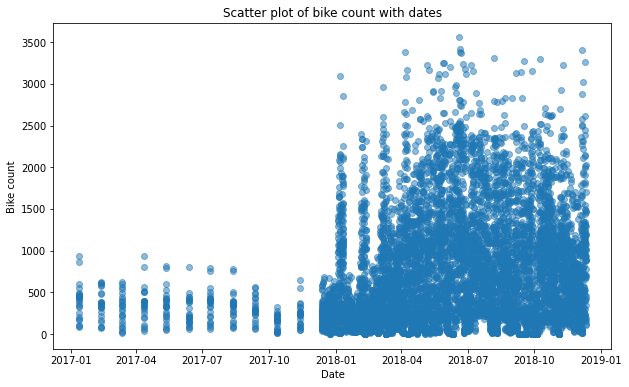

In [153]:
# scatter plot of bike count on differant dates.

plt.figure(figsize=(10,6))
plt.scatter(df['Date'], df['Rented Bike Count'], alpha=0.5)
plt.title('Scatter plot of bike count with dates')
plt.xlabel('Date')
plt.ylabel('Bike count')
plt.show()

Finding the Inter quartile range for the purpose to
deal with Outliers. 

In [154]:
# finding the inter-quartile range.
 
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

Rented Bike Count             874.25
Hour                           11.50
Temperature(°C)                19.00
Humidity(%)                    32.00
Wind speed (m/s)                1.40
Visibility (10m)             1060.00
Dew point temperature(°C)      19.50
Solar Radiation (MJ/m2)         0.93
Rainfall(mm)                    0.00
Snowfall (cm)                   0.00
year                            0.00
month                           6.00
Winter                          0.00
Spring                          1.00
Summer                          1.00
Autumn                          0.00
dtype: float64


In [155]:
# listing features to remove outliers.

features = list(df.columns)
features = features[2:]
list_0 = ['Hour','Winter','Spring','Summer','Autumn','Holiday','Functioning Day','month','year']
new_features = [x for x in features if x not in list_0]

Here we get columns to compute the further problem. 


In [156]:
# printing the column for new features.

new_features

['Temperature(°C)',
 'Humidity(%)',
 'Wind speed (m/s)',
 'Visibility (10m)',
 'Dew point temperature(°C)',
 'Solar Radiation (MJ/m2)',
 'Rainfall(mm)',
 'Snowfall (cm)']

In [157]:
# Finding the lower and the upper range of the outliers.

df[new_features] = df[new_features][~((df[new_features] < (Q1 - 1.5 * IQR)) |
                                      (df[new_features] > (Q3 + 1.5 * IQR))).any(axis=1)]

Finding the lower and the upper bracket for determining the outliers.

In [158]:
# checking the null value count after removing the outliers.

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 19 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   Date                       8760 non-null   datetime64[ns]
 1   Rented Bike Count          8760 non-null   int64         
 2   Hour                       8760 non-null   int64         
 3   Temperature(°C)            7078 non-null   float64       
 4   Humidity(%)                7078 non-null   float64       
 5   Wind speed (m/s)           7078 non-null   float64       
 6   Visibility (10m)           7078 non-null   float64       
 7   Dew point temperature(°C)  7078 non-null   float64       
 8   Solar Radiation (MJ/m2)    7078 non-null   float64       
 9   Rainfall(mm)               7078 non-null   float64       
 10  Snowfall (cm)              7078 non-null   float64       
 11  Holiday                    8760 non-null   object        
 12  Functi

In [159]:
# filling null values with mean values.

df['Temperature(°C)'] = df['Temperature(°C)'].fillna(df['Temperature(°C)'].mean())

df['Humidity(%)'] = df['Humidity(%)'].fillna(df['Humidity(%)'].mean())

df['Wind speed (m/s)'] = df['Wind speed (m/s)'].fillna(df['Wind speed (m/s)'].mean())

df['Visibility (10m)'] = df['Visibility (10m)'].fillna(df['Visibility (10m)'].mean())

df['Dew point temperature(°C)'] = df['Dew point temperature(°C)'].fillna(df['Dew point temperature(°C)'].mean())

df['Solar Radiation (MJ/m2)'] = df['Solar Radiation (MJ/m2)'].fillna(df['Solar Radiation (MJ/m2)'].mean()) 

df['Rainfall(mm)'] = df['Rainfall(mm)'].fillna(df['Rainfall(mm)'].mean())

df['Snowfall (cm)'] = df['Snowfall (cm)'].fillna(df['Snowfall (cm)'].mean())

After removing the outliers Filling the null counts with the mean of the respected columns. 


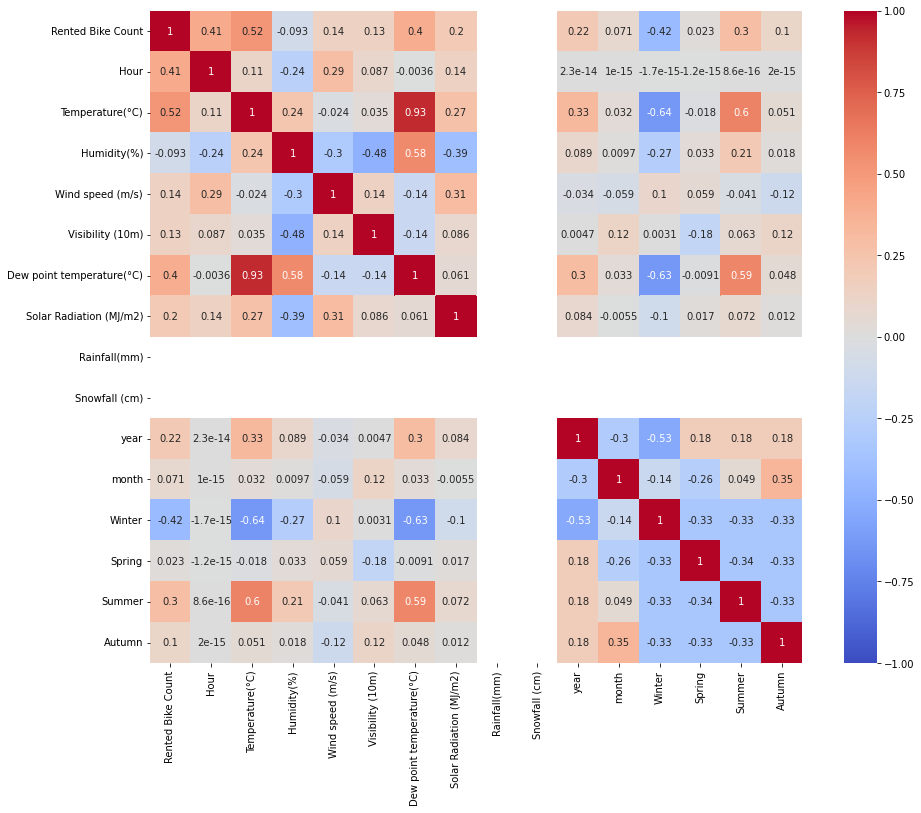

In [160]:
# checking correlation from heatmap.

plt.figure(figsize=(15,12))
sns.heatmap(df.corr('pearson'),vmin=-1, vmax=1,cmap='coolwarm',annot=True, square=True);

Checking the correlation between the columns after take a look at outliers. 


In [161]:
# dropping columns with more (or less) correlation.

df.drop(columns=['Dew point temperature(°C)','Date','Rainfall(mm)','Snowfall (cm)','year'],axis=1,inplace=True)

Dropping the columns having multicolinearity with each other.(i.e their beta values are same) 

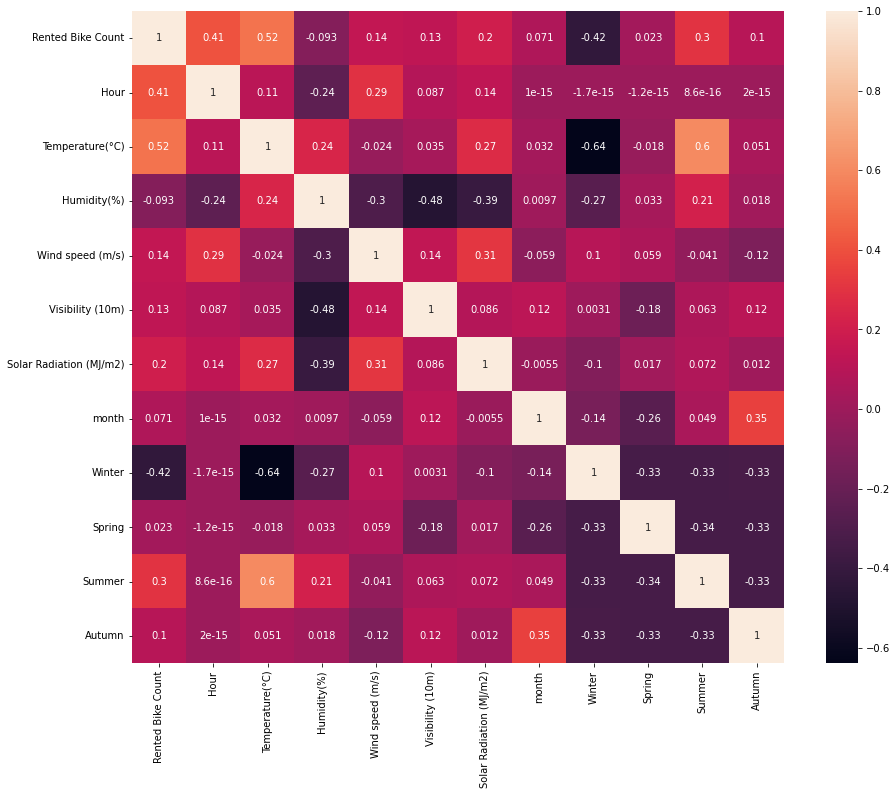

In [162]:
# extracting correlation heatmap.

plt.figure(figsize=(15,12))
sns.heatmap(df.corr('pearson'),annot=True, square=True);

In [163]:
# function to calculate Multicollinearity.

from statsmodels.stats.outliers_influence import variance_inflation_factor
def calc_vif(X):

    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    return(vif)

In [164]:
# multicollinearity result.

calc_vif(df[[i for i in df.describe().columns if i not in ['Rented Bike Count','Date']]])

,variables,VIF
0,Hour,1.186328
1,Temperature(°C),2.871155
2,Humidity(%),2.137895
3,Wind speed (m/s),1.264894
4,Visibility (10m),1.503631
5,Solar Radiation (MJ/m2),1.591228
6,month,1.211705
7,Winter,16.509521
8,Spring,17.996409
9,Summer,22.666811


Variation inflation factor shows the collinearity index of that column with respect to the dependent variable.

In [165]:
# dropping "summer" column as it adds to multicollinearity.

df.drop(columns=['Summer'],axis=1,inplace=True)

In [166]:
calc_vif(df[[i for i in df.describe().columns if i not in ['Rented Bike Count','Date']]])

,variables,VIF
0,Hour,4.232652
1,Temperature(°C),6.982894
2,Humidity(%),10.146646
3,Wind speed (m/s),5.800116
4,Visibility (10m),7.565901
5,Solar Radiation (MJ/m2),2.203240
6,month,5.226156
7,Winter,3.829748
8,Spring,2.343245
9,Autumn,2.386321


Checking the variation inflation factor after removing the summer column.


In [167]:
# Taking a look at the data after dealing with outliers (filling the values with mean).

df.info() 


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Rented Bike Count        8760 non-null   int64  
 1   Hour                     8760 non-null   int64  
 2   Temperature(°C)          8760 non-null   float64
 3   Humidity(%)              8760 non-null   float64
 4   Wind speed (m/s)         8760 non-null   float64
 5   Visibility (10m)         8760 non-null   float64
 6   Solar Radiation (MJ/m2)  8760 non-null   float64
 7   Holiday                  8760 non-null   object 
 8   Functioning Day          8760 non-null   object 
 9   month                    8760 non-null   int64  
 10  Winter                   8760 non-null   int64  
 11  Spring                   8760 non-null   int64  
 12  Autumn                   8760 non-null   int64  
dtypes: float64(5), int64(6), object(2)
memory usage: 889.8+ KB


In [168]:
# converting object type columns to float.

df['Functioning Day'] = df['Functioning Day'].astype(float)
df['Holiday'] = df['Holiday'].astype(float)

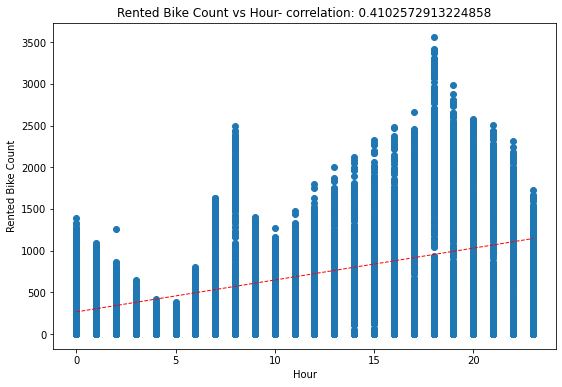

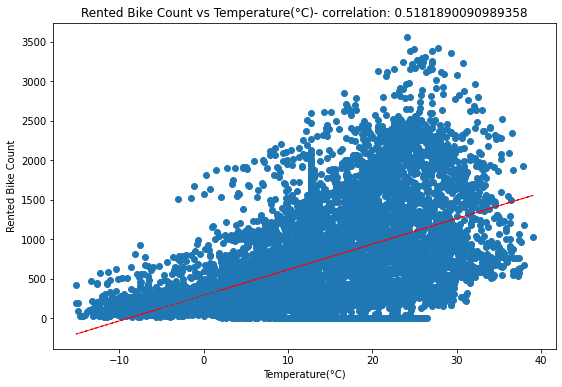

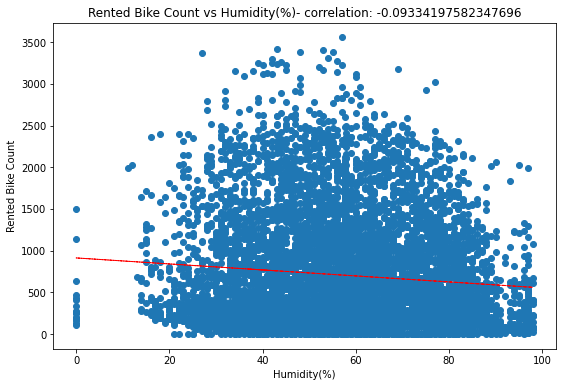

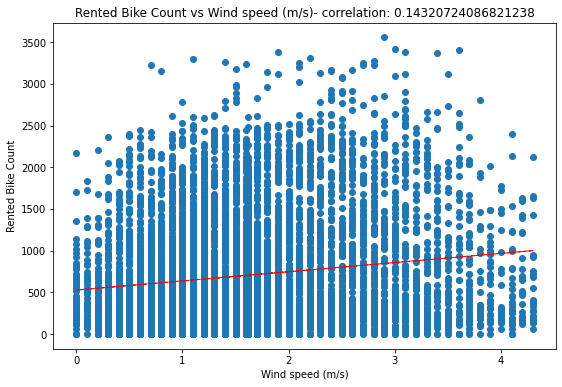

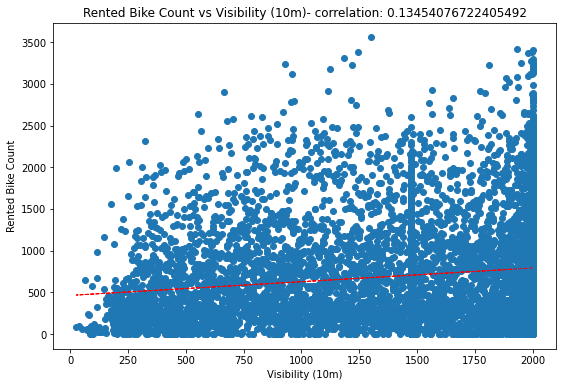

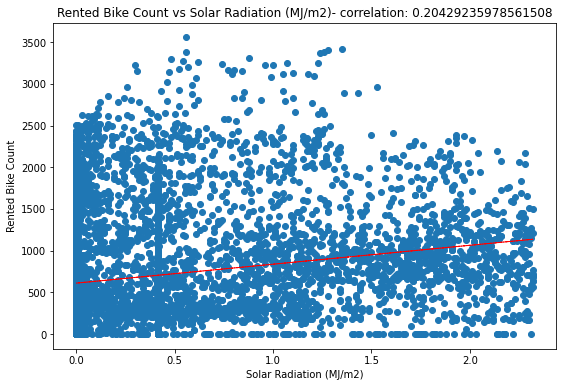

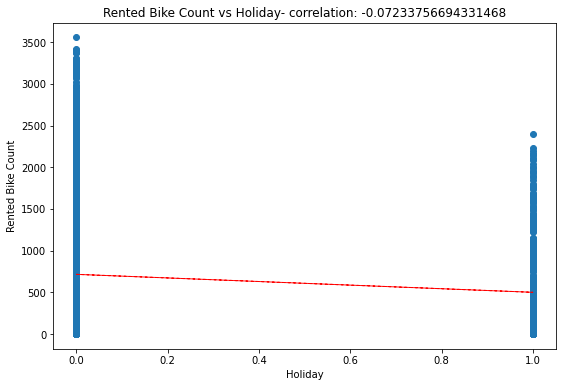

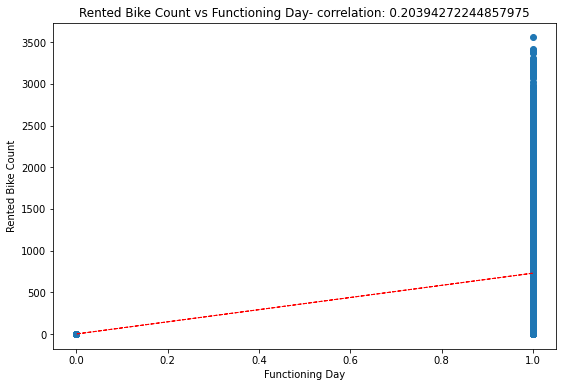

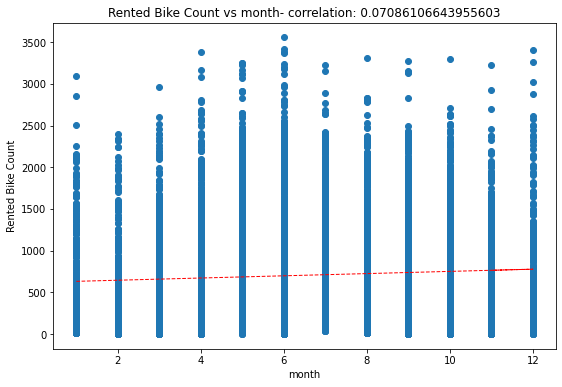

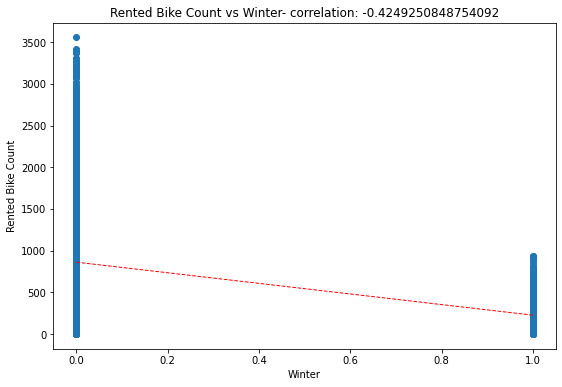

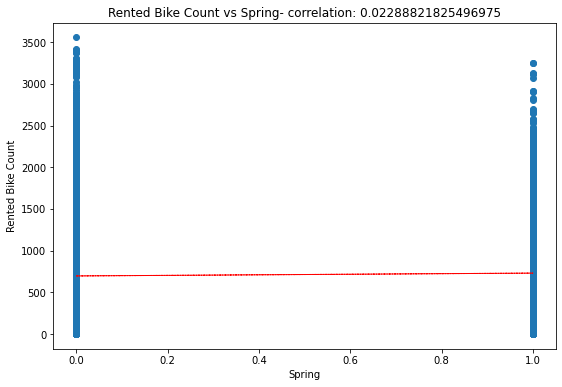

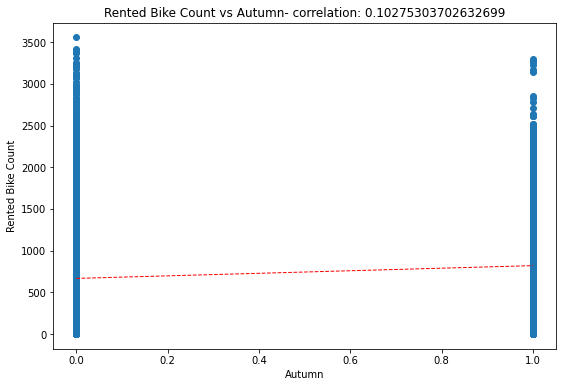

In [169]:
# obtaining correlation plots between dependent and independent variables.

numeric_features = df.columns
for col in numeric_features[1:]:
    fig = plt.figure(figsize=(9, 6))
    ax = fig.gca()
    feature = df[col]
    label = df['Rented Bike Count']
    correlation = feature.corr(label)
    plt.scatter(x=feature, y=label)
    plt.xlabel(col)
    plt.ylabel('Rented Bike Count')
    ax.set_title('Rented Bike Count vs ' + col + '- correlation: ' + str(correlation))
    z = np.polyfit(df[col], df['Rented Bike Count'], 1)
    y_hat = np.poly1d(z)(df[col])

    plt.plot(df[col], y_hat, "r--", lw=1)

plt.show()

The red line passing through the scattered plot shows the linear function of the rented bike count and the respected features.


# Data Preparation 

In [170]:
# Creating the data of independent variables.

Y = df['Rented Bike Count']

# Create the dependent variable data.

X = df.drop(columns=['Rented Bike Count'],axis=1).values
X

array([[ 0. , -5.2, 37. , ...,  1. ,  0. ,  0. ],
       [ 1. , -5.5, 38. , ...,  1. ,  0. ,  0. ],
       [ 2. , -6. , 39. , ...,  1. ,  0. ,  0. ],
       ...,
       [21. ,  2.6, 39. , ...,  0. ,  0. ,  1. ],
       [22. ,  2.1, 41. , ...,  0. ,  0. ,  1. ],
       [23. ,  1.9, 43. , ...,  0. ,  0. ,  1. ]])

In [171]:
# Splitting the dataset into the Training set and Test set.

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 42)

In [172]:
# Transforming data.

scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

Spliting the data in to train and test scaling it so that the various types of magnitudes are getting fit into standard distribution.( µ=0 and σ'=1)


# Linear Regression 

In [173]:
# Fitting Multiple Linear Regression to the Training set.

regressor = LinearRegression()
regressor.fit(X_train, Y_train)

LinearRegression()

In [174]:
# Predicting the Train set results.

Y_pred_train = regressor.predict(X_train)

In [175]:
# Predicting the Test set results.

Y_pred_test = regressor.predict(X_test)

In [176]:
# r2 score of train set.

r2_linear_train = r2_score(Y_train, Y_pred_train)

In [177]:
# R square for linear train.

r2_linear_train

0.5159573585193946

In [178]:
r2_linear_test = r2_score(Y_test, Y_pred_test)

In [179]:
# different metrics used. 

MSE  = mean_squared_error(Y_test,Y_pred_test)
print("MSE :" , MSE)

RMSE = np.sqrt(MSE)
print("RMSE :" ,RMSE)

r2_linear_test = r2_score(Y_test,Y_pred_test)
R2 = r2_linear_test
print("R2 :" ,R2)
Adjusted_R2 = (1-(1-r2_score(Y_test,Y_pred_test))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))
print("Adjusted R2 : ",Adjusted_R2)

MSE : 213300.00835301352
RMSE : 461.8441385933284
R2 : 0.48805487953961213
Adjusted R2 :  0.4845221932569642


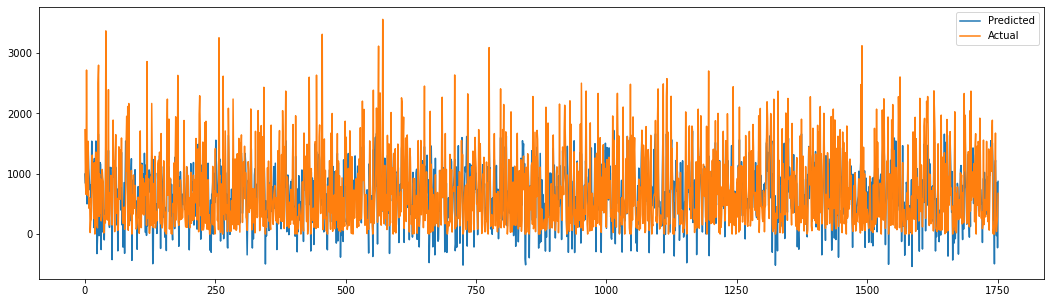

In [180]:
# plotting results from above model.

plt.figure(figsize=(18,5))
plt.plot((Y_pred_test))
plt.plot(np.array((Y_test)))
plt.legend(["Predicted","Actual"])
plt.show()

#Lasso regression

In [181]:
lasso_model = Lasso()
#setting the parameters of the lasso model
parameters = {'alpha': [1e-15,1e-13,1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,1e-1,1,5,10,20,30,40,45,50,55,60,100,0.0014]}
lasso_regressor = GridSearchCV(lasso_model, parameters, scoring='neg_mean_squared_error', cv=5)
lasso_regressor.fit(X_train,Y_train)

GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [1e-15, 1e-13, 1e-10, 1e-08, 1e-05, 0.0001,
                                   0.001, 0.01, 0.1, 1, 5, 10, 20, 30, 40, 45,
                                   50, 55, 60, 100, 0.0014]},
             scoring='neg_mean_squared_error')

In [182]:
# Getting best parameters.

print("The best fit alpha value is found out to be :" ,lasso_regressor.best_params_)
print("\nUsing ",lasso_regressor.best_params_, " the negative mean squared error is: ", lasso_regressor.best_score_)

The best fit alpha value is found out to be : {'alpha': 0.1}

Using  {'alpha': 0.1}  the negative mean squared error is:  -201925.4980621704


In [183]:
Y_pred_lasso = lasso_regressor.predict(X_test)

In [184]:
# evaluating metrics.

MSE  = mean_squared_error(Y_test,Y_pred_lasso)
print("MSE :" , MSE)

RMSE = np.sqrt(MSE)
print("RMSE :" ,RMSE)

r2_lasso_test = r2_score(Y_test,Y_pred_lasso)

R2 = r2_lasso_test
print("R2 :" ,R2)
Adjusted_R2 = (1-(1-r2_score(Y_test,Y_pred_lasso))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))
print("Adjusted R2 : ",Adjusted_R2)

MSE : 213273.42144515304
RMSE : 461.8153542760927
R2 : 0.48811869124713336
Adjusted R2 :  0.4845864452982924


#Ridge regression 

In [185]:
# Training model.

from sklearn.linear_model import Ridge
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
ridge = Ridge()
parameters = {'alpha': [1,0.001,10,20,35,60,70,100,800,1200]}
ridge_regressor = GridSearchCV(ridge, parameters, scoring='neg_mean_squared_error', cv=3)
ridge_regressor.fit(X_train,Y_train)

GridSearchCV(cv=3, estimator=Ridge(),
             param_grid={'alpha': [1, 0.001, 10, 20, 35, 60, 70, 100, 800,
                                   1200]},
             scoring='neg_mean_squared_error')

In [186]:
# Getting best parameters.

print("The best fit alpha value is found out to be :" ,ridge_regressor.best_params_)
print("\nUsing ",ridge_regressor.best_params_, " the negative mean squared error is: ", ridge_regressor.best_score_)

The best fit alpha value is found out to be : {'alpha': 0.001}

Using  {'alpha': 0.001}  the negative mean squared error is:  -201979.77851009383


In [187]:

Y_pred_ridge = ridge_regressor.predict(X_test)

In [188]:
# evaluating metrics.

MSE  = mean_squared_error(Y_test,Y_pred_ridge)
print("MSE :" , MSE)

RMSE = np.sqrt(MSE)
print("RMSE :" ,RMSE)

r2_ridge_test = r2_score(Y_test,Y_pred_ridge)
R2 = r2_ridge_test
print("R2 :" ,R2)
Adjusted_R2 = (1-(1-r2_score(Y_test,Y_pred_ridge))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))
print("Adjusted R2 : ",Adjusted_R2)

MSE : 213299.99590594516
RMSE : 461.8441251179289
R2 : 0.48805490941404095
Adjusted R2 :  0.484522223337542


#Elastic Net Regression

In [189]:
elastic = ElasticNet()

# finding the best parameters for ridge model by gridsearchcv

parameters = {'alpha': [1,0.001,10,20,35,60,70,100,800,1200]}
elastic_net_regressor = GridSearchCV(elastic, parameters, scoring='neg_mean_squared_error', cv=3)
elastic_net_regressor.fit(X_train,Y_train)

GridSearchCV(cv=3, estimator=ElasticNet(),
             param_grid={'alpha': [1, 0.001, 10, 20, 35, 60, 70, 100, 800,
                                   1200]},
             scoring='neg_mean_squared_error')

In [190]:
# Getting best parameters.

print("The best fit alpha value is found out to be :" ,elastic_net_regressor.best_params_)
print("\nUsing ",elastic_net_regressor.best_params_, " the negative mean squared error is: ", elastic_net_regressor.best_score_)

The best fit alpha value is found out to be : {'alpha': 0.001}

Using  {'alpha': 0.001}  the negative mean squared error is:  -202015.26140922963


In [191]:
Y_pred_elastic_net = elastic_net_regressor.predict(X_test)

In [192]:
# evaluating metrics.

MSE  = mean_squared_error(Y_test,Y_pred_elastic_net)
print("MSE :" , MSE)

RMSE = np.sqrt(MSE)
print("RMSE :" ,RMSE)

r2_elastic_net_test = r2_score(Y_test,Y_pred_elastic_net)
R2 = r2_elastic_net_test
print("R2 :" ,R2)
Adjusted_R2 = (1-(1-r2_score(Y_test,Y_pred_elastic_net))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))
print("Adjusted R2 : ",Adjusted_R2)

MSE : 213301.9449454291
RMSE : 461.8462351751166
R2 : 0.4880502314899231
Adjusted R2 :  0.4845175131333268


# Decision-tree model

In [193]:
# training model.

from sklearn.tree import DecisionTreeRegressor
decisionTree = DecisionTreeRegressor()

param = {'max_depth' : [1,4,5,6,7,10,15,20,8]}

gridSearch_decisionTree=GridSearchCV(decisionTree,param,scoring='r2',cv=6)
gridSearch_decisionTree.fit(X_train,Y_train)


best_DecisionTree=gridSearch_decisionTree.best_estimator_
bestDecisionTree_testScore=best_DecisionTree.score(X_test,Y_test)
r2_decision_test = best_DecisionTree.score(X_test,Y_test)

In [194]:
# extracting best parameters.

print(f"The best Decision Tree R2 score is {gridSearch_decisionTree.best_score_} with max depth {gridSearch_decisionTree.best_params_['max_depth']}")
print('\n')
print(f"The best R2 test score is : {bestDecisionTree_testScore} with max depth = {gridSearch_decisionTree.best_params_['max_depth']}")

The best Decision Tree R2 score is 0.7759985611193162 with max depth 10


The best R2 test score is : 0.7701894441642173 with max depth = 10


# Random forest regression model

In [195]:
# training model.

from sklearn.ensemble import RandomForestRegressor
randomForestAlgo = RandomForestRegressor()

param = {'n_estimators' : [int(x) for x in np.linspace(start=10,stop=20, num=5)], 
         'max_depth' : [15,20],
         'min_samples_split':[2,4],
         'min_samples_leaf':[1,2],
         'bootstrap' : [True,False]
        }
gridSearch_RandomForest=GridSearchCV(randomForestAlgo,param,scoring='r2',cv=5)
gridSearch_RandomForest.fit(X_train,Y_train)

best_randomForest=gridSearch_RandomForest.best_estimator_
bestRandomForest_testScore=best_randomForest.score(X_test,Y_test)
r2_randomforest_test = best_randomForest.score(X_test,Y_test)

In [196]:
print(f"The best Random Forest R2 train score is : {gridSearch_RandomForest.best_score_} with n estimators = {gridSearch_RandomForest.best_params_['n_estimators']}, max depth : {gridSearch_RandomForest.best_params_['max_depth']}, min samples split : {gridSearch_RandomForest.best_params_['min_samples_split']} and min samples leaf : {gridSearch_RandomForest.best_params_['min_samples_leaf']}")
print('\n')
print(f"The best Random Forest R2 test score is : {bestRandomForest_testScore} with n estimators = {gridSearch_RandomForest.best_params_['n_estimators']}, max depth : {gridSearch_RandomForest.best_params_['max_depth']}, min samples split : {gridSearch_RandomForest.best_params_['min_samples_split']} and min samples leaf : {gridSearch_RandomForest.best_params_['min_samples_leaf']}")

The best Random Forest R2 train score is : 0.833737113471009 with n estimators = 20, max depth : 15, min samples split : 4 and min samples leaf : 2


The best Random Forest R2 test score is : 0.8119417517613036 with n estimators = 20, max depth : 15, min samples split : 4 and min samples leaf : 2


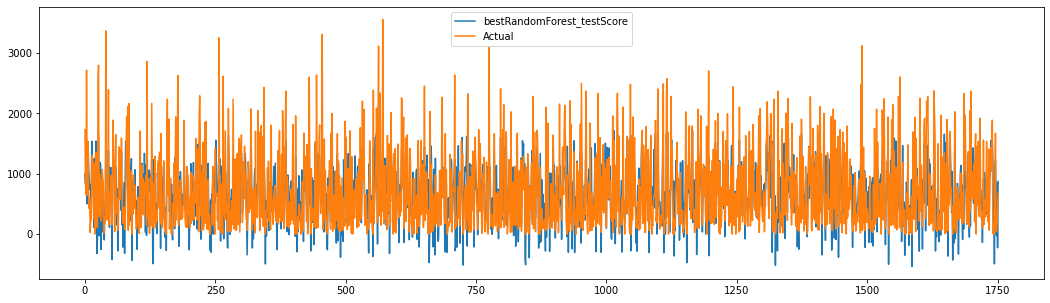

In [197]:
# plotting results from above model.

plt.figure(figsize=(18,5))
plt.plot((Y_pred_test))
plt.plot(np.array((Y_test)))
plt.legend(["bestRandomForest_testScore","Actual"])
plt.show()

#Conclusion :- EDA

* The  highest demand for rental bikes was noted in June.
* Summer is the busiest season in regards to rented bike demand Peak demand for rented bike is around 6pm (18:00). 
* Rented bike demand is less during winter season, in comparison to other seasons . 
* On working day, the rental bike demand is high in comparison to holiday

# **conclusion:-**      
In conclusion, a machine learning model for predicting bike sharing demand can be developed using various algorithms such as linear regression, decision trees, and random forests. The model's performance can be evaluated using metrics such as mean absolute error and mean squared error. The key features that influence demand, such as temperature, humidity, and time of day, can be used as input variables for the model. Additionally, incorporating external data sources, such as weather forecasts and event schedules, can improve the accuracy of the model. However, it is also important to note that the model should be regularly retrained and updated with new data to ensure its continued performance.

* Linear model, Lasso model, Ridge model, and Elasticnet model have Adjusted-R2 value below 50%.

* According to Decision tree and random forest tests, temperature is the most important feature and has the highest impact on rented bike demand.

* On the basis of R2 and Adjusted-R2, Decision tree and Random Forest model are best as the accuracy of these models are above 75% and also their Adjusted-R2 values are less than R2 values.

* Random forest model's R2 and Adjusted-R2 values are 0.8339 and 0.8193 respectively.

